# Short

In [1]:
from datetime import timedelta
from datetime import datetime

In [2]:
end = datetime.today()
start = end - timedelta(weeks=24)

In [3]:
end = end.strftime('%Y%m%d')
start = start.strftime('%Y%m%d')

In [4]:
print(end)
print(start)

20230119
20220804


## 종목코드

In [5]:
firm_name = 'HLB'

In [6]:
import pandas as pd
df = pd.read_csv('./database/stock_code.csv')

In [7]:
df.head(1)

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DL,210,기타 금융업,지주회사,1976-02-02,12월,전병욱,http://www.dlholdings.co.kr,서울특별시


In [8]:
stock_code = df[df['회사명'] == firm_name]['종목코드'].iloc[0]
print(stock_code)

28300


In [9]:
type(stock_code)

numpy.int64

In [10]:
stock_code = str(stock_code)
type(stock_code)

str

In [11]:
stock_code = stock_code.zfill(6)
print(stock_code)

028300


## 공매도잔고

In [12]:
from pykrx import stock

In [13]:
print(stock_code)

028300


In [14]:
df_pykrx = stock.get_shorting_status_by_date(start, end, stock_code)

In [15]:
df_pykrx.tail(3)

,거래량,잔고수량,거래대금,잔고금액
날짜,,,,
2023-01-13,30600,4711754,970088550,150540540300
2023-01-16,18360,4706291,587591050,151071941100
2023-01-17,49697,4727305,1563936100,148201011750


## 그래프

In [16]:
from matplotlib import pyplot as plt

In [17]:
data = df_pykrx.잔고수량

In [18]:
print(data[:3])

날짜
2022-08-04    4929857
2022-08-05    4871230
2022-08-08    4815030
Name: 잔고수량, dtype: int32


In [19]:
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

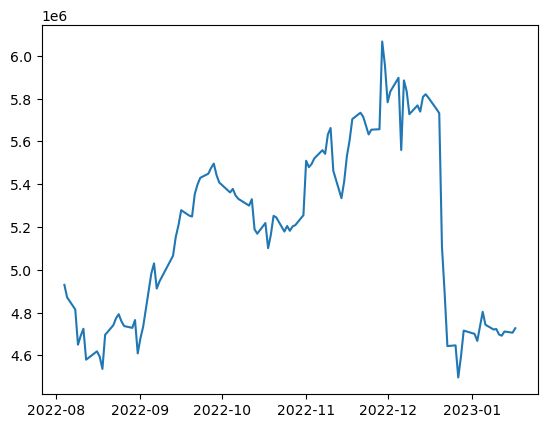

In [20]:
plt.plot(data)
plt.show()

## 저장하기

In [21]:
import os

In [22]:
base_dir = 'C:\\'
file_name = firm_name

In [23]:
filepath = os.path.join(base_dir,'Users','user','Desktop') 

In [24]:
if os.path.exists(filepath):
    filename = os.path.join(filepath, file_name) + '.png'
    print(filename)
else:
    print(f"{filepath} directory not exists.")

C:\Users\user\Desktop\HLB.png


In [25]:
plt.savefig(filename)

<Figure size 640x480 with 0 Axes>

## 전체코드

In [26]:
from matplotlib import pyplot as plt
from datetime import timedelta
from datetime import datetime
from pykrx import stock
import pandas as pd
import matplotlib
import os

def short():
    
    matplotlib.rcParams['font.family'] = 'DejaVu Sans'
    
    end = datetime.today()
    start = end - timedelta(weeks=24)

    end = end.strftime('%Y%m%d')
    start = start.strftime('%Y%m%d')
        
    firm_names = ['에코프로비엠','셀트리온','HMM','엘앤에프','아모레퍼시픽','카카오뱅크','크래프톤','포스코케미칼','두산에너빌리티','SK바이오사이언스','HLB','LG생활건강']
    for firm_name in firm_names:
        plt.clf()
        
        df = pd.read_csv('./database/stock_code.csv')
        stock_code = df[df['회사명'] == firm_name]['종목코드'].iloc[0]
        stock_code = str(stock_code)
        stock_code = stock_code.zfill(6)

        df_pykrx = stock.get_shorting_status_by_date(start, end, stock_code)
        data = df_pykrx.잔고수량

        plt.plot(data)

        base_dir = 'C:\\'
        file_name = firm_name

        filepath = os.path.join(base_dir,'Users','user','Desktop','short') 

        if os.path.exists(filepath):
            filename = os.path.join(filepath, file_name) + '.png'
            print(filename)
        else:
            print(f"{filepath} directory not exists.")

        plt.savefig(filename)

C:\Users\user\Desktop\short\에코프로비엠.png
C:\Users\user\Desktop\short\셀트리온.png
C:\Users\user\Desktop\short\HMM.png
C:\Users\user\Desktop\short\엘앤에프.png
C:\Users\user\Desktop\short\아모레퍼시픽.png
C:\Users\user\Desktop\short\카카오뱅크.png
C:\Users\user\Desktop\short\크래프톤.png
C:\Users\user\Desktop\short\포스코케미칼.png
C:\Users\user\Desktop\short\두산에너빌리티.png
C:\Users\user\Desktop\short\SK바이오사이언스.png
C:\Users\user\Desktop\short\HLB.png
C:\Users\user\Desktop\short\LG생활건강.png


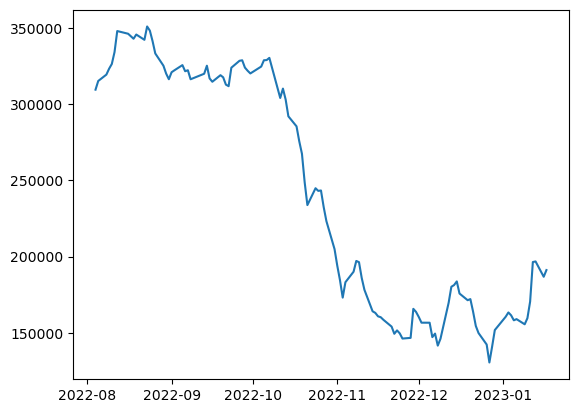

In [27]:
short()